3.Se face preprocesare de date; se explica in limba romana care sunt metodele de preprocesare folosite, efectul lor pe datele de intrare, ce forma are iesirea obtinuta; se arata efectele pasilor de preprocesare asupra setului de date (noul numar de documente, dinamica vocabularului, trasaturile rezultate etc.) Se pot aduga grafice si tabele la acest pas.

4.Clasificare sau regresie, dupa caz: se face o descriere a modelelor considerate, in limba romana; se descrie modalitatea de cautare a hiperparametrilor; rezultatele obtinute se vor prezenta tabelar, similar cu tema precedenta.

# 3
- se elimina anumite caractere care nu aduc un aport considerabil in problema regresiei/clasificarii. Dupa eliminare, vor ramane acelasi cuvinte cu exceptia celor eliminate care vor fi inlocuite cu " ". Acesta nu va afecta continutul mesajelor.
- reprezentarea textului sub forma bag of words: se obtine un dictionar care contine contorizarea tuturor apartiile cuvintelor in textul dat. 
    - din sklearn.feature_extraction.text folosim clasa CountVectorizer, pentru a face operatia descrisa anterior.
    - se poate observa ca numarul de elemente este mai mic dupa reprezentarea textului in format BOW

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
path="D:\ids\sentiment labelled sentences"
path1=path+"\\amazon_cells_labelled.txt"
path2=path+"\\imdb_labelled.txt"
path3=path+"\\yelp_labelled.txt"
data1 = pd.read_csv(path1, sep="\t", header=None)
data2=pd.read_csv(path2, sep="\t", header=None)
data3=pd.read_csv(path3, sep="\t", header=None)
data= [data1, data2, data3]
data= pd.concat(data)

In [9]:
vect = CountVectorizer()
text=data[0].values
vect.fit_transform(text)
dim=0
for i in range (len(text)):
    dim+=len(text[i])
v=[dim, len(vect.vocabulary_)]
print("Numarul de cuvinte din textul original: ", dim)
print("Numarul de cuvinte dupa aplicare BOW:", len(vect.vocabulary_))
print(vect.vocabulary_)

Numarul de cuvinte din textul original:  196560
Numarul de cuvinte dupa aplicare BOW: 5155
{'so': 4161, 'there': 4545, 'is': 2427, 'no': 3043, 'way': 4987, 'for': 1829, 'me': 2809, 'to': 4609, 'plug': 3387, 'it': 2432, 'in': 2314, 'here': 2158, 'the': 4531, 'us': 4835, 'unless': 4793, 'go': 1982, 'by': 647, 'converter': 1013, 'good': 1993, 'case': 713, 'excellent': 1603, 'value': 4861, 'great': 2023, 'jawbone': 2449, 'tied': 4589, 'charger': 768, 'conversations': 1012, 'lasting': 2567, 'more': 2931, 'than': 4526, '45': 45, 'minutes': 2890, 'major': 2753, 'problems': 3482, 'mic': 2868, 'have': 2113, 'jiggle': 2464, 'get': 1954, 'line': 2648, 'up': 4821, 'right': 3777, 'decent': 1171, 'volume': 4928, 'if': 2282, 'you': 5138, 'several': 4004, 'dozen': 1373, 'or': 3144, 'hundred': 2259, 'contacts': 987, 'then': 4542, 'imagine': 2294, 'fun': 1901, 'of': 3097, 'sending': 3968, 'each': 1440, 'them': 4538, 'one': 3124, 'are': 273, 'razr': 3611, 'owner': 3200, 'must': 2980, 'this': 4558, 'needl

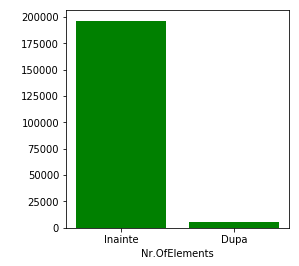

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (4, 4)
fig, ax = plt.subplots()
ax.bar(["Inainte", "Dupa"],v, color="green")
ax.set(xlabel="Nr.OfElements", ylabel=" ");

- Eliminare cuvinte neinformative (stopwords)- s-au eliminat cuvinte predefinite din limba engleza existente in CountVectorizer (stop_words='english') si eliminarea cuvintelor care nu au mai mult de 5 aparitii 

In [11]:
vect2 = CountVectorizer(min_df=5,stop_words='english')
vect2.fit_transform(text)
print("Numarul de cuvinte dupa eliniarea cuvintelor neinformative:", len(vect2.vocabulary_))

Numarul de cuvinte dupa eliniarea cuvintelor neinformative: 642


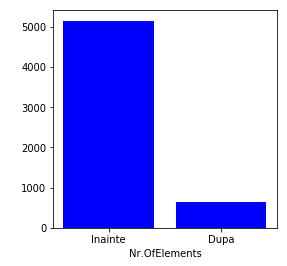

In [8]:
fig, ax = plt.subplots()
ax.bar(["Inainte", "Dupa"],[v[1], len(vect2.vocabulary_)], color="blue")
ax.set(xlabel="Nr.OfElements", ylabel=" ");

# 4

KNeighborsRegressor

Algoritmul k-NN este o metodă neparametrizata utilizată pentru clasificare și regresie. În ambele cazuri, intrarea constă în exemplele de instruire k cele mai apropiate din spațiul caracteristic. Producția depinde de faptul dacă k-NN este folosit pentru clasificare sau regresie: in regresia k-NN, ieșirea este valoarea proprietății pentru obiect. Această valoare reprezintă media valorilor celor mai apropiați vecini. k-NN este un tip de învățare bazată pe instanțe sau învățare leneșă, în care funcția este aproximată doar la nivel local și toate calculele sunt amânate până la clasificare. Algoritmul k-NN este printre cei mai simpli dintre toți algoritmi de învățare a mașinilor.

Cautatrea paramaterilor s-a facut prin GridSearchCV si RandomizedSearchCV:
- s-a cautat optimizarea pentru parametrii :
    - n_neighbors : int, optional (default = 5): Numărul de vecini care vor fi utilizați în mod implicit pentru interogările k_neighbors.
    - p : int, optional (default = 2). Atunci când p = 1, aceasta este echivalentă cu utilizarea manhattan_distance (l1) și a duratei euclidiene (l2) pentru p = 2. Pentru p arbitrar, se utilizează minkowski_distance (l_p). Dar in cazul intrarilor de tip text nu se poate lua in considere utilizarea  minkowski_distance.

DecisionTreeRegressor

Decision Trees (DTs) sunt o metodă de învățare neparametrică supravegheată folosită pentru clasificare și regresie. Scopul este de a crea un model care prezice valoarea unei variabile țintă prin învățarea unor simple reguli de decizie deduse din caracteristicile de date. De asemenea, arborii de decizie pot fi aplicați și pentru problemele de regresie, utilizând clasa DecisionTreeRegressor. Ca și în setarea de clasificare, metoda de potrivire va lua ca arhitecturi de argument X și y, numai că în acest caz y este de așteptat să aibă valori în virgulă mobilă în loc de valori întregi. Putem observa că dacă adâncimea maximă a copacului (controlată de parametrul max_depth) este setată prea înaltă, arborii de decizie învață detalii prea fine ale datelor de antrenament și învață din noise, adică se suprapun.

Cautatrea paramaterilor s-a facut prin GridSearchCV si RandomizedSearchCV:
- s-a cautat optimizarea pentru parametrii :
    - max_features : int, float, string or None, optional (default=None) Numărul de caracteristici care trebuie luate în considerare atunci când căutați cea mai bună împărțire.
    - min_samples_split : int, optional (default=2).Numărul minim de eșantioane necesare pentru divizarea unui nod intern.
    -  min_samples_leaf : int, optional (default=1). Numărul minim de eșantioane necesare la un nod frunza.

MLPRegressor

Un perceptron multistrat (MLP) este o clasă a rețelei neuronale artificiale. Un MLP constă din cel puțin trei straturi de noduri: un strat de intrare, un strat ascuns și un strat de ieșire. Cu excepția nodurilor de intrare, fiecare nod este un neuron care utilizează o funcție de activare neliniară. MLP utilizează o tehnică de învățare supervizata numită backpropagation pentru formare. Straturile sale multiple și activarea neliniară disting MLP de un perceptron liniar. Poate distinge date care nu pot fi separate liniar.
Cautatrea paramaterilor s-a facut prin GridSearchCV si RandomizedSearchCV:
- s-a cautat optimizarea pentru parametrii :
    - activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}, default ‘relu’.Funcția de activare pentru stratul ascuns."identity", activare no-op, returnează f (x) = x "logistic", funcția sigmoid logistică, returnează f (x) = 1 / (1 + exp (-x)). "tanh", funcția tan hiperbolică, returnează f (x) = tanh (x). "relu", funcția liniară rectificată, returnează f (x) = max (0, x)
    - solver : {‘lbfgs’, ‘sgd’, ‘adam’}, default ‘adam’.Solver pentru optimizarea greutății.
    - alpha : float, optional, default 0.0001. Valoarea penalizării L2 (termenul de regularizare).

LogisticRegresion

Regresia logistică este utilizată pentru a descrie datele și pentru a explica relația dintre o variabilă binară dependentă și una sau mai multe variabile independente la nivel nominal, ordinal, interval sau independent.
Cautatrea paramaterilor s-a facut prin GridSearchCV si RandomizedSearchCV:
- C: float, optional (default=1.0) paramatru de regularizare; trebuie să fie un flotant pozitiv. Ca și în mașinile vectoriale de suport, valorile mai mici specifică o regularizare mai puternică.